# Customer Segmentation
**using K-means clustering**
(performing a clustering algorithm and dimensionality reduction.)

In [254]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans  
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns  
from pca import pca as pca1
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")

In [19]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio


In [20]:
from bioinfokit.visuz import cluster

**Viewing and Describing the data**

In [21]:
df = pd.read_csv(r"C:\Users\Sahito\Downloads\py\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
df.shape

(200, 5)

In [23]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [24]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [25]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**The 'customer_id' column has no relevence therefore deleting it**

In [26]:
df.drop(["CustomerID"], axis=1, inplace =True)

In [27]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**Cleaning the data labels (Annual income and Spending Score) using rename().**

In [28]:
df = df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'})
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**Analysis and Visualization of Data**

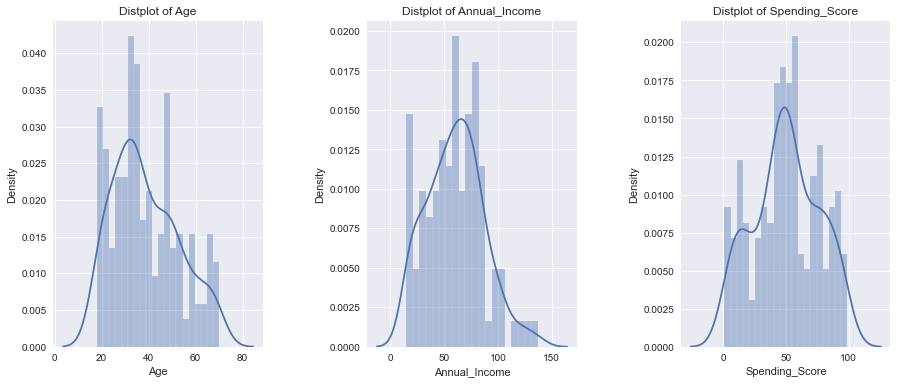

In [29]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'Annual_Income', 'Spending_Score']:
    n +=1
    plt.subplot(1,3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

**Finding and viewing Corelations**

In [30]:
corr = df.corr()
corr

,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


**Plotting the heatmap of correlation of all the columns of the dataset.**

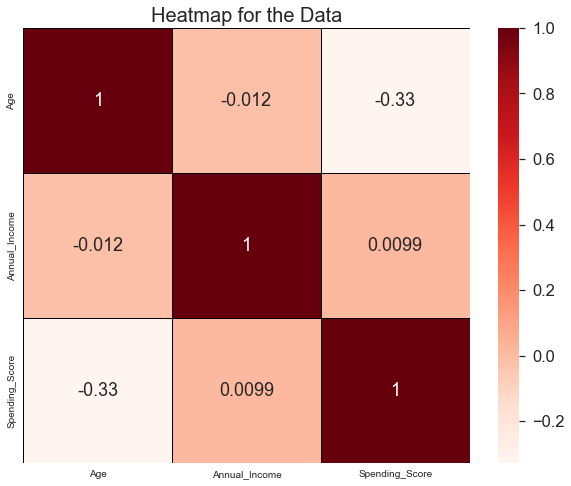

In [31]:


fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.heatmap(corr, cmap = 'Reds', annot = True, linewidths=0.5, linecolor='black')
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

# Gender Data Visualization

In [284]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [283]:
# Counting each type of Gender
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

**Plotting Gender Distribution on Bar graph and the ratio of distribution using Pie Chart.**

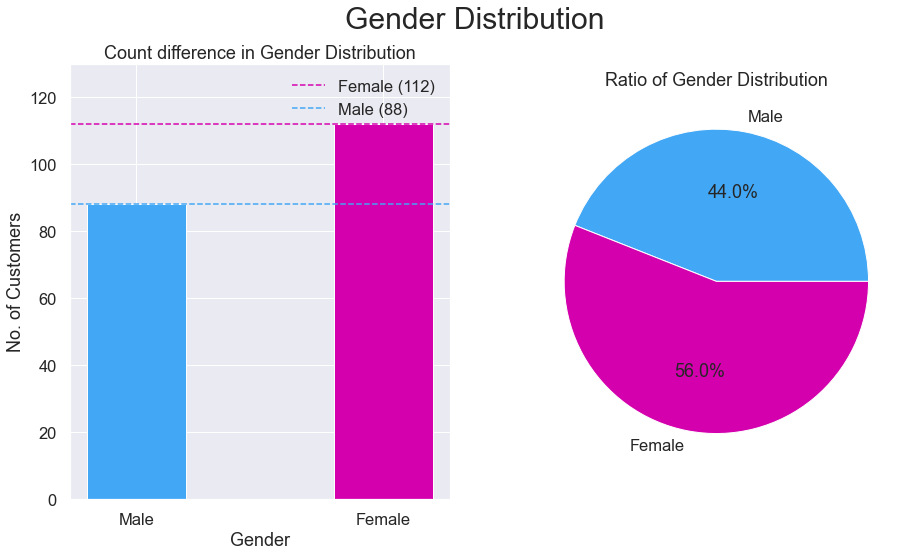

In [33]:
labels=df['Gender'].unique()
values=df['Gender'].value_counts(ascending=True)


fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
bar = ax0.bar(x=labels, height=values, width=0.4, align='center', color=['#42a7f5','#d400ad'])
ax0.set(title='Count difference in Gender Distribution',xlabel='Gender', ylabel='No. of Customers')
ax0.set_ylim(0,130)
ax0.axhline(y=df['Gender'].value_counts()[0], color='#d400ad', linestyle='--', label=f'Female ({df.Gender.value_counts()[0]})')
ax0.axhline(y=df['Gender'].value_counts()[1], color='#42a7f5', linestyle='--', label=f'Male ({df.Gender.value_counts()[1]})')
ax0.legend()


ax1.pie(values,labels=labels,colors=['#42a7f5','#d400ad'],autopct='%1.1f%%')
ax1.set(title='Ratio of Gender Distribution')
fig.suptitle('Gender Distribution', fontsize=30);
plt.show()

# Age Data Visualization

In [282]:
#Finding the unique values in the column.

df['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [281]:
df['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

**Visualizing Statistical Description of the Age on a boxplot.**

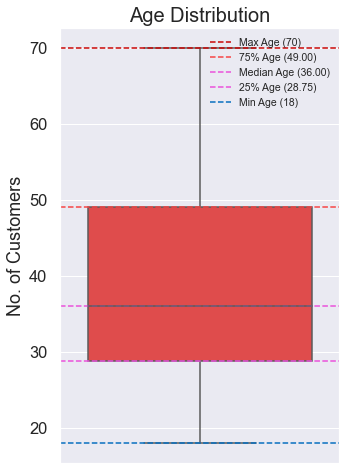

In [280]:


fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=df["Age"], color="#f73434")
ax.axhline(y=df['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({df.Age.max()})')
ax.axhline(y=df['Age'].describe()[6], linestyle='--',color='#f74343', label=f'75% Age ({df.Age.describe()[6]:.2f})')
ax.axhline(y=df['Age'].median(), linestyle='--',color='#eb50db', label=f'Median Age ({df.Age.median():.2f})')
ax.axhline(y=df['Age'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Age ({df.Age.describe()[4]:.2f})')
ax.axhline(y=df['Age'].min(), linestyle='--',color='#046ebf', label=f'Min Age ({df.Age.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

**Representing Age, Annual Income and Spending score based on Gender**

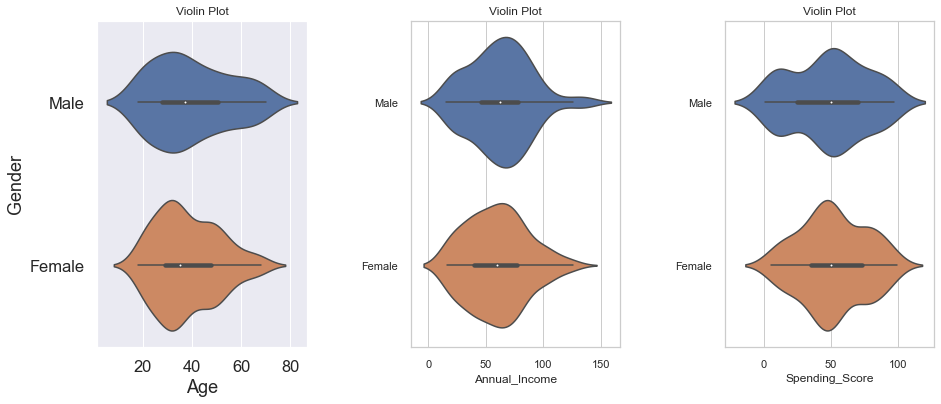

In [37]:
plt.figure(1, figsize=(15,6))
n=0
for cols in ['Age', 'Annual_Income', 'Spending_Score']:
    n +=1
    plt.subplot(1,3, n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x =cols, y= 'Gender', data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Violin Plot')
    
plt.show()

**Visualizing distribution of age count in Male customers using a countplot.**



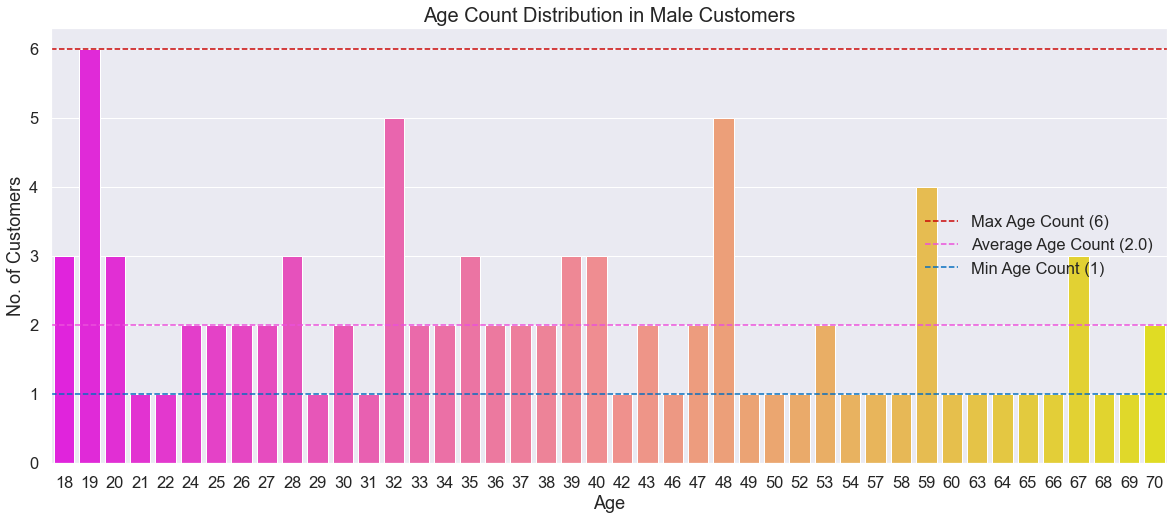

In [278]:
maxi = df[df['Gender']=='Male'].Age.value_counts().max()
mean = df[df['Gender']=='Male'].Age.value_counts().mean()
mini = df[df['Gender']=='Male'].Age.value_counts().min()


fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=df[df['Gender']=='Male'].Age, palette='spring')

ax.axhline(y=maxi, linestyle='--',color='#c90404', label=f'Max Age Count ({maxi})')
ax.axhline(y=mean, linestyle='--',color='#eb50db', label=f'Average Age Count ({mean:.1f})')
ax.axhline(y=mini, linestyle='--',color='#046ebf', label=f'Min Age Count ({mini})')
ax.set_ylabel('No. of Customers')

ax.legend(loc ='right')

plt.title('Age Count Distribution in Male Customers', fontsize = 20)
plt.show()

**Visualizing distribution of age count in Female customers using a countplot.**

In [ ]:
maxi = df[df['Gender']=='Female'].Age.value_counts().max()
mean = df[df['Gender']=='Female'].Age.value_counts().mean()
mini = df[df['Gender']=='Female'].Age.value_counts().min()


fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data[data['Gender']=='Female'].Age, palette='spring')
ax.axhline(y=maxi, linestyle='--',color='#c90404', label=f'Max Age Count ({maxi})')
ax.axhline(y=mean, linestyle='--',color='#eb50db', label=f'Average Age Count ({mean:.1f})')
ax.axhline(y=mini, linestyle='--',color='#046ebf', label=f'Min Age Count ({mini})')
ax.set_ylabel('No. of Customers')
ax.legend(loc ='right')

plt.title('Age Distribution in Female Customers', fontsize = 20)
plt.show()

# Analyzing Annual Income data

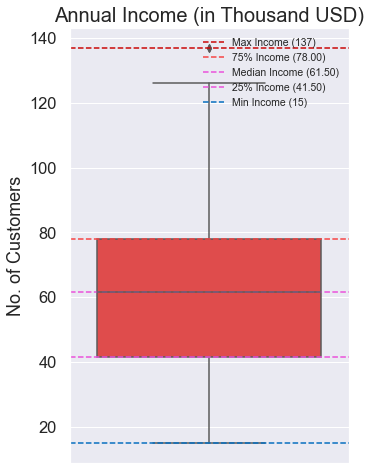

In [279]:
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=df["Annual_Income"], color="#f73434")
ax.axhline(y=df["Annual_Income"].max(), linestyle='--',color='#c90404', label=f'Max Income ({df.Annual_Income.max()})')
ax.axhline(y=df["Annual_Income"].describe()[6], linestyle='--',color='#f74343', label=f'75% Income ({df.Annual_Income.describe()[6]:.2f})')
ax.axhline(y=df["Annual_Income"].median(), linestyle='--',color='#eb50db', label=f'Median Income ({df.Annual_Income.median():.2f})')
ax.axhline(y=df["Annual_Income"].describe()[4], linestyle='--',color='#eb50db', label=f'25% Income ({df.Annual_Income.describe()[4]:.2f})')
ax.axhline(y=df["Annual_Income"].min(), linestyle='--',color='#046ebf', label=f'Min Income ({df.Annual_Income.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Annual Income (in Thousand USD)', fontsize = 20)
plt.show()

**Visualizing difference of Annual Income between Male and Female Customers using Violin Plot.**

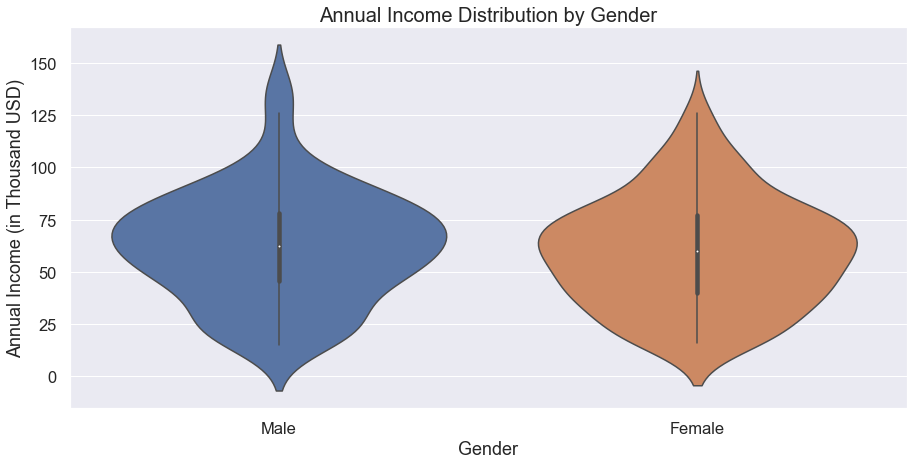

In [40]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.violinplot(y=df['Annual_Income'],x=df['Gender'])
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income Distribution by Gender', fontsize = 20)
plt.show()

# Analyzing Spending Score data

**Visualizing statistical data about Spending score column on a boxplot.**

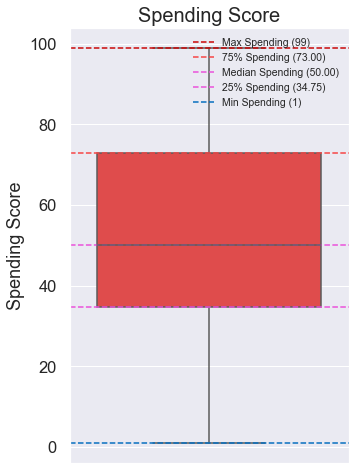

In [53]:
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=df['Spending_Score'], color="#f73434")
ax.axhline(y=df['Spending_Score'].max(), linestyle='--',color='#c90404', label=f'Max Spending ({df.Spending_Score.max()})')
ax.axhline(y=df['Spending_Score'].describe()[6], linestyle='--',color='#f74343', label=f'75% Spending ({df.Spending_Score.describe()[6]:.2f})')
ax.axhline(y=df['Spending_Score'].median(), linestyle='--',color='#eb50db', label=f'Median Spending ({df.Spending_Score.median():.2f})')
ax.axhline(y=df['Spending_Score'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Spending ({df.Spending_Score.describe()[4]:.2f})')
ax.axhline(y=df['Spending_Score'].min(), linestyle='--',color='#046ebf', label=f'Min Spending ({df.Spending_Score.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('Spending Score')

plt.title('Spending Score', fontsize = 20)
plt.show()

**Visualizing difference of Spending Score between Male and Female Customers using Violin Plot.**

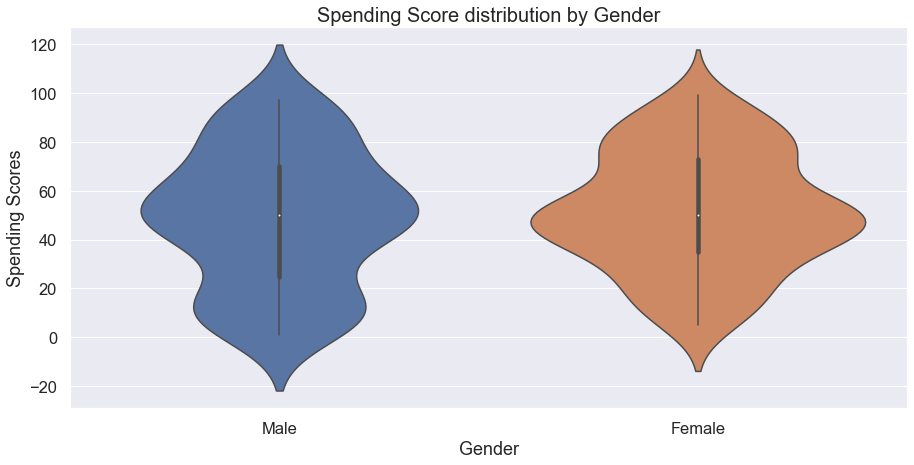

In [42]:


fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.violinplot(y=df['Spending_Score'],x=df['Gender'])
ax.set_ylabel('Spending Scores')

plt.title('Spending Score distribution by Gender', fontsize = 20)
plt.show()

# K means Assumptions

**Why is it important to look into the descriptive statistics, distribution and correlation between variables?
In order to apply K-means, we need to meet the algorithm assumptions.**

**K-means assumes:**

- **Cluster's shape**: The variance of the distribution is spherical meaning that clusters have a spherical shape. In order for this to be true, all variables should be normally distributed and have the same variance.
- **Clusters' Size**: All clusters have the same number of observations.
- **Relationship between variables**: There is little or no correlation between the variables.
In our dataset, our variables are normally distributed. Variances are quite close to each other. Except for age that has a lower variance that the rest of the variables. We could find a proper transformation to solve this issue. We could apply the logarithm or Box-Cox transformation.  Box-Cox is a family of transformations which allows us to correct non-normal distributed variables or non-equal variances.

# Dimensionality reduction
**After we checked that we can apply k-means, we can apply Principal Component Analysis (PCA) to discover which dimensions best maximize the variance of features involved.**

# Principal Component Analysis (PCA)
First, we'll transform the categorical variable into two binary variables.

In [131]:
df["Male"] = df.Gender.apply(lambda x: 0 if x == "Male" else 1)
df["Female"] = df.Gender.apply(lambda x: 0 if x == "Female" else 1)

In [132]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,Male,Female
0,Male,19,15,39,0,1
1,Male,21,15,81,0,1
2,Female,20,16,6,1,0
3,Female,23,16,77,1,0
4,Female,31,17,40,1,0


Then, we are going to select from the dataset all the useful columns.  

In [208]:
X = df.iloc[:, 1:4]

In [209]:
X.head()

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


**n_components show the percentage explained by how many Principal components**

In [221]:
pca1()

In [238]:
model = pca1(n_components =2, normalize = True)

In [239]:
results = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [3] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [240]:
loadings = results['loadings']

In [241]:
loadings

,Age,Annual_Income,Spending_Score
PC1,0.706382,-0.048024,-0.706199
PC2,0.030141,0.998832,-0.037775


In [242]:
scores= results['PC']
scores['labels']=df.iloc[:, 0]
scores.head()

,PC1,PC2,labels
0,-0.615720,-1.763481,Male
1,-1.665793,-1.820747,Male
2,0.337862,-1.674799,Female
3,-1.456573,-1.772430,Female
4,-0.038465,-1.662740,Female


**Scree Plot**

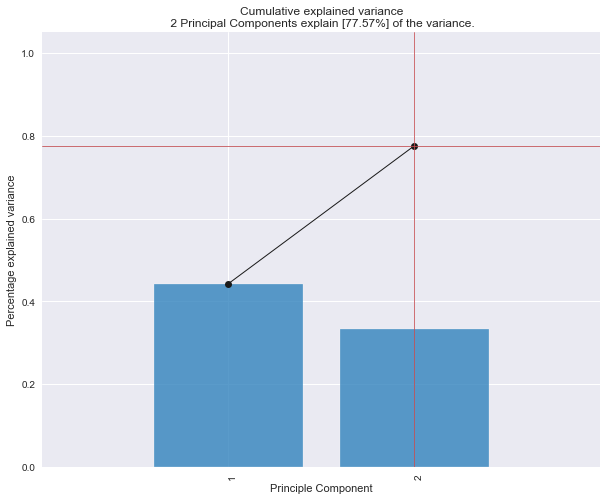

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 576x396 with 0 Axes>

In [243]:
model.plot(figsize=(10,8))
plt.show

**It shows 2 Principal components explained about 77% of variance**

**(As the number of PCs is equal to the number of original variables, We should keep only the PCs which explain the most variance (70-95%) to make the interpretation easier. More the PCs you include that explains most variation in the original data, better will be the PCA model.)**

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.


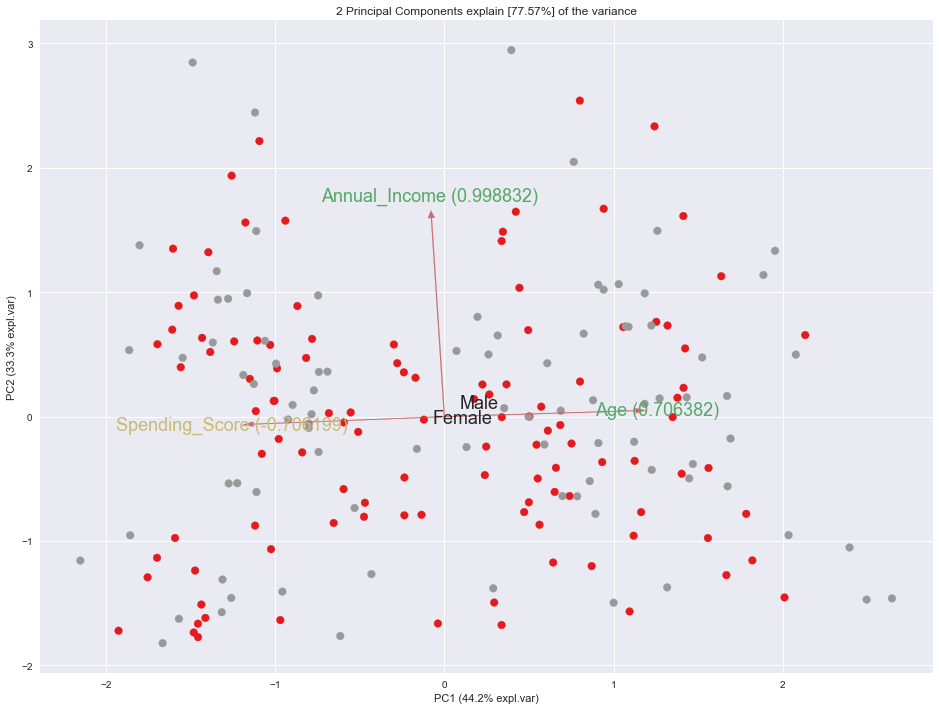

In [250]:
model.biplot(n_feat=3, legend=False, figsize=(16,12), y=df.iloc[:, 0], label=True)
plt.show()

**Generated correlation matrix plot for loadings,**

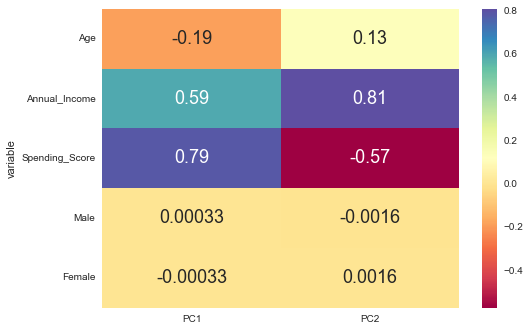

In [252]:
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()


**We can observe that Annual Income as well as Spending Score are principal components.**

# K means Clustering

K-means clustering is a clustering algorithm that aims to partition n observations into k clusters. Initialisation – K initial “means” (centroids) are generated at random Assignment – K clusters are created by associating each observation with the nearest centroid Update – The centroid of the clusters becomes the new mean, Assignment and Update are repeated iteratively until convergence The end result is that the sum of squared errors is minimised between points and their respective centroids.

In [255]:
X.head()

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [256]:
X.isna().sum()

Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

 select the data that we need for clustering.

In [259]:
clustering_data = X.iloc[:,[1,2]]
clustering_data.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Now, we need to visualize the data which we are going to use for the clustering. This will give us a fair idea about the data we're working on.

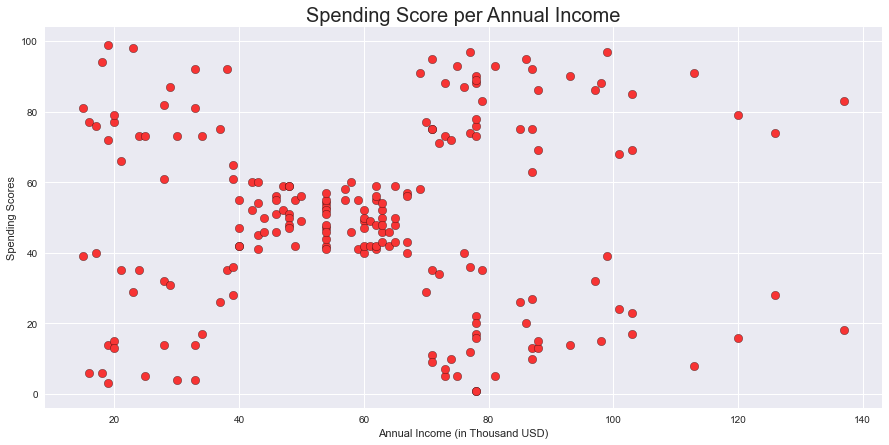

In [261]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=clustering_data['Spending_Score'],x=clustering_data['Annual_Income'], s=70, color='#f73434', edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')
ax.set_xlabel('Annual Income (in Thousand USD)')
plt.title('Spending Score per Annual Income', fontsize = 20)
plt.show()

**Determining No. of Clusters Required**

**The Elbow Method**
The Elbow Method

The Elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

When these overall metrics for each model are plotted, it is possible to visually determine the best value for k. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k. The “arm” can be either up or down, but if there is a strong inflection point, it is a good indication that the underlying model fits best at that point.

We use the Elbow Method which uses Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value. WCSS measures sum of distances of observations from their cluster centroids

In [263]:
#With this simple line of code we get all the inertia value or the within the cluster sum of square.
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,30):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

array([269981.28      , 181363.5959596 , 106348.37306211,  73679.78903949,
        44448.45544793,  37239.83554246,  30259.65720729,  25043.89004329,
        21826.93630323,  19705.95027292,  17887.08445663,  15830.08755586,
        14591.25703522,  12746.96909218,  12258.9990709 ,  10913.27327835,
         9960.62308201,   9124.54175226,   8669.64162923,   8165.21923077,
         7758.32686064,   7303.41525974,   6803.51178544,   6468.79184294,
         6165.36255411,   5922.1384943 ,   5321.129329  ,   5195.96750064,
         5061.35444833])

Inertia can be recognized as a measure of how internally coherent clusters are.

Now, we visualize the Elbow Method so that we can determine the number of optimal clusters for our dataset.

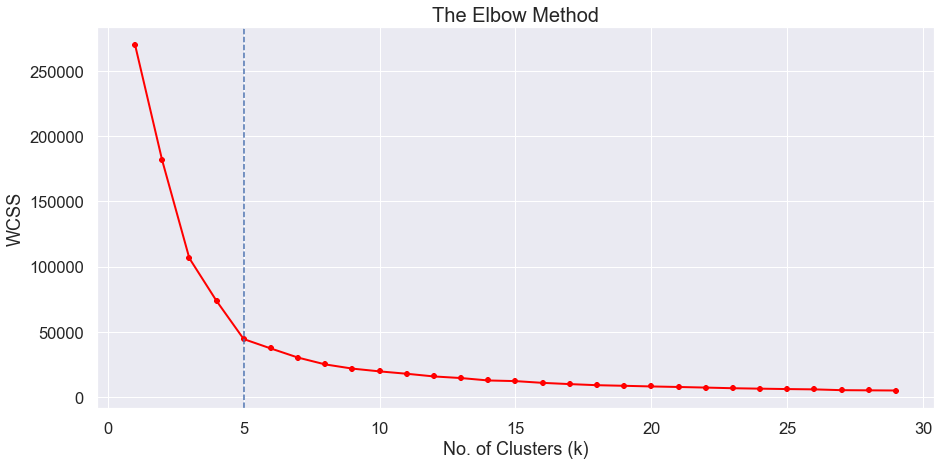

In [264]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,30),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=5, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

**It is clear, that the optimal number of clusters for our data are 5, as the slope of the curve is not steep enough after it**

# Clustering
Now we will build the model for creating clusters from the dataset. We will use n_clusters = 5 i.e. 5 clusters as we have determined by the elbow method, which would be optimal for our dataset.

Our data set is for unsupervised learning therefore we will use fit_predict() Suppose we were working with supervised learning data set we would use fit_tranform()

In [265]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=5, init='k-means++')
kms.fit(clustering_data)

KMeans(n_clusters=5)

Now that we have the clusters created, we will enter them into a different column

In [266]:


clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head()

,Annual_Income,Spending_Score,Cluster_Prediction
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3


We can also get the centroids of the clusters by the cluster_centers_ attribute of KMeans algorithm.



In [267]:
kms.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

Now we have all the data we need, we just need to plot the data. We will plot the data using scatterplot which will allow us to observe different clusters in different colours.

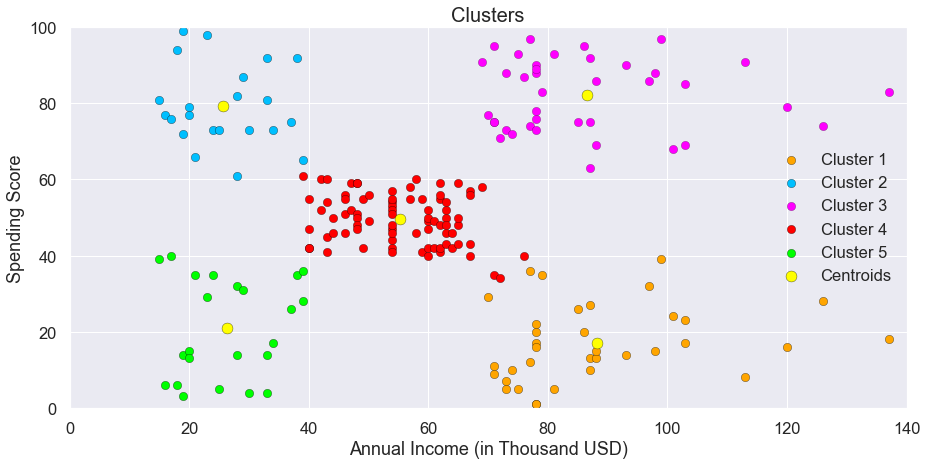

In [269]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')



plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='right')
plt.xlim(0,140)
plt.ylim(0,100)
plt.xlabel('Annual Income (in Thousand USD)')
plt.ylabel('Spending Score')
plt.title('Clusters', fontsize = 20)
plt.show()

# Analysis
Analyzing Data using the above graph becomes much more easier as it gives us a visual aid for better understanding of the data. Kmeans has divided the dataset into 5 clusters based on Annual income and the spending scores of the individual customers. The following clusters are created by the model,

- 1.Cluster Orange
- 2.Cluster Blue
- 3.Cluster Purple
- 4.Cluster Red
- 5.Cluster Green 



Visualizing all the clusters Seperately will provide us more insights.

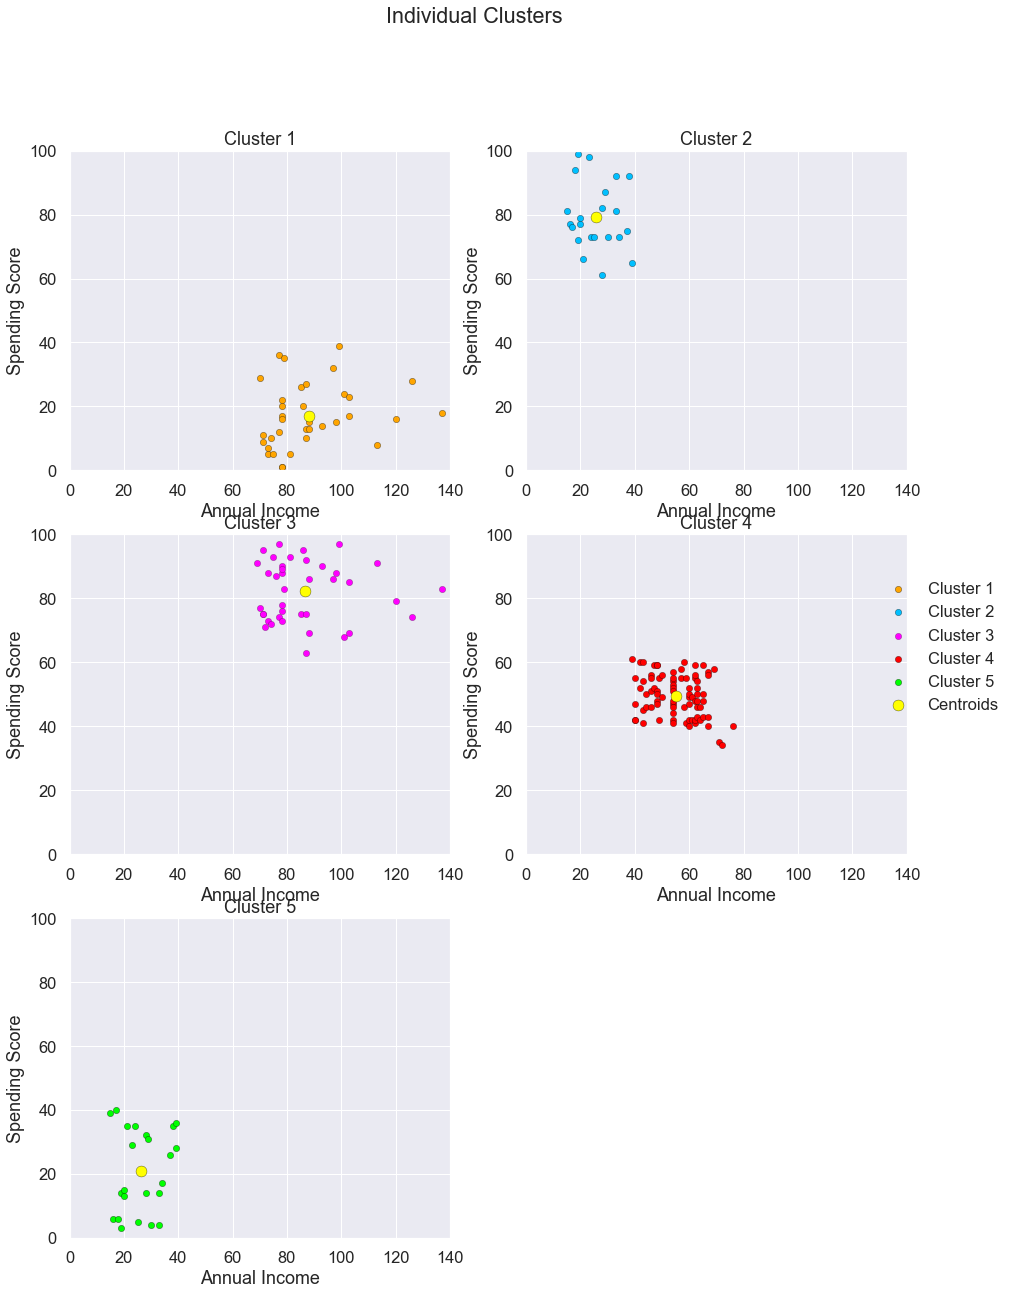

In [270]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
ax[0,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')
ax[0,0].scatter(x=kms.cluster_centers_[4,0], y=kms.cluster_centers_[4,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[0,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 1')

ax[0,1].scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')
ax[0,1].scatter(x=kms.cluster_centers_[0,0], y=kms.cluster_centers_[0,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[0,1].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 2')

ax[1,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')
ax[1,0].scatter(x=kms.cluster_centers_[2,0], y=kms.cluster_centers_[2,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[1,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 3')

ax[1,1].scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')
ax[1,1].scatter(x=kms.cluster_centers_[1,0], y=kms.cluster_centers_[1,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[1,1].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 4')

ax[2,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')
ax[2,0].scatter(x=kms.cluster_centers_[3,0], y=kms.cluster_centers_[3,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3, label='Centroids')
ax[2,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 5')

fig.delaxes(ax[2,1])
fig.legend(loc='right')
fig.suptitle('Individual Clusters')
plt.show()

- 1.**Cluster Orange :Unsatisfied Customers**

Earning high and spending less. We see that people have high income but low spending scores, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.

- 2. **Cluster Blue -  Spenders**

This type of customers earns less but spends more Annual Income is less but spending high, so can also be treated as potential target customer we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The shops/malls might not target these people that effectively but still will not lose them.

- 3. **Cluster Purple - Target Customers :**

Earning high and also spending high Target Customers. Annual Income High as well as Spending Score is high, so a target consumer. we see that people have high income and high spending scores, this is the ideal case for the mall or shops as these people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities. 

- 4. **Cluster Red - Normal Customer :**

Customers are average in terms of earning and spending An Average consumer in terms of spending and Annual Income we see that people have average income and an average spending score, these people again will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score.

- 5. **Cluster Green - Balanced Customers :**

They earn less and spend less. We can see people have low annual income and low spending scores, this is quite reasonable as people having low salaries prefer to buy less, in fact, these are the wise people who know how to spend and save money. The shops/mall will be least interested in people belonging to this cluster.

